In [1]:
import numpy as np
from matplotlib import pyplot as plt

In [2]:
def lno_data(data):
      new_data = []
      lines = data.splitlines()
      for line in lines:
            columns = line.split()
            if len(columns)>1:
                  if not line.startswith("#"): 
                        new_data.append(columns)

      new_data = np.array(new_data)

      lno_thresh = []
      for i in range(new_data.shape[0]):
            thresh_vir = new_data[:,0][i].split(sep=',')[1]
            thresh_vir = float(thresh_vir.strip('(),'))
            lno_thresh.append(thresh_vir)

      lno_data = np.array(new_data[:,1:],dtype="float32")

      lno_thresh = np.array(lno_thresh,dtype="float32")
      lno_qmc_corr = lno_data[:,0]
      lno_qmc_err = lno_data[:,1]
      lno_qmc_p2_corr = lno_data[:,2]

      return lno_thresh,lno_qmc_corr,lno_qmc_err,lno_qmc_p2_corr

In [3]:
# H80 a = 0.96892 # 1.831aB
# AFQMC energy: -43.2513 +/- 0.0008
# converged SCF energy = -41.9835706086777
# E(RCCSD) = -43.2187515626576
# ccsd(t) energy: -43.25881794557464
# DMRG energy =  -43.277423271142652
afqmc_corr = -43.2513 - -41.9835706086777
afqmc_err = 0.0008
ccsd_corr = -43.2187515626576- -41.9835706086777
ccsd_t_corr = -43.25881794557464 - -41.9835706086777
dmrg_corr = -43.277423271142652 - -41.9835706086777
print(afqmc_corr)
print(ccsd_corr)
print(ccsd_t_corr)
print(dmrg_corr)

-1.2677293913222982
-1.2351809539798992
-1.275247336896939
-1.2938526624649498


In [4]:
data = '''
# thresh(occ,vir)       afqmc_corr         err         mp2_afqmc_corr   ccsd_corr   hf_cr    err   ccsd_cr   err   ave_olp_ratio   err   ave_norb   max_norb   ave_nelec   max_nelec  run_time
 (1.00e-03,1.00e-04)     -1.147700       0.000090        -1.215492       -1.147008       -1.056818       0.000981        -0.090882       0.000973        7.65    8       5.60    6       2598.40
# (5.00e-04,5.00e-05)     -1.180769       0.000092        -1.229405       -1.178832       -1.078576       0.000984        -0.102197       0.000955        9.40    10      5.90    6       2775.73
 (3.00e-04,3.00e-05)     -1.181338       0.000088        -1.229580       -1.179058       -1.078264       0.001003        -0.103077       0.000943        9.60    10      5.90    6       2795.16
 (1.00e-04,1.00e-05)     -1.225936       0.000123        -1.240748       -1.220478       -1.055764       0.000969        -0.170178       0.000873        14.25           16      9.60    10      3418.16
 (1.00e-05,1.00e-06)     -1.247485       0.000284        -1.250355       -1.236536       -0.964946       0.000876        -0.282533       0.000726        23.35           26      16.70   18      5108.92
 (1.00e-06,1.00e-07)     -1.248875       0.000441        -1.249205       -1.236942       -0.834131       0.000785        -0.414743       0.000521        36.05           44      28.40   34      10292.92
 (1.00e-07,1.00e-08)     -1.248205       0.000680        -1.248237       -1.235742       -0.729156       0.000674        -0.519054       0.000516        48.60           60      41.30   50      23880.65
 (1.00e-08,1.00e-09)     -1.249424       0.000902        -1.249426       -1.235324       -0.650848       0.000678        -0.598569       0.000509        59.75           74      53.70   68      42553.40
'''
lno_thresh,lno_qmc_corr,lno_qmc_err,lno_qmc_p2_corr\
    = lno_data(data)

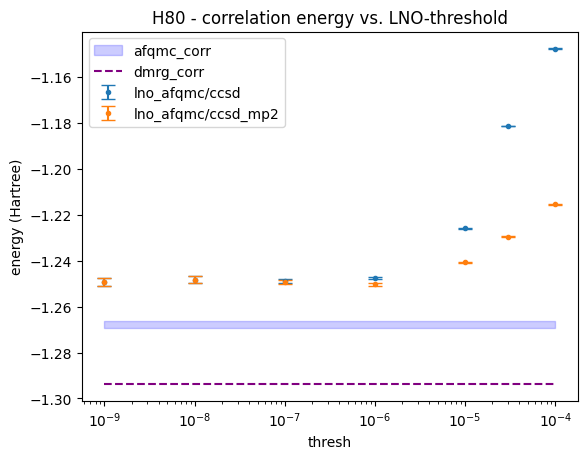

In [8]:
plt.errorbar(
    lno_thresh,lno_qmc_corr,yerr=lno_qmc_err*2,fmt='.',capsize=5,label='lno_afqmc/ccsd')
plt.errorbar(
    lno_thresh,lno_qmc_p2_corr,yerr=lno_qmc_err*2,fmt='.',capsize=5,label='lno_afqmc/ccsd_mp2')
# plt.plot(
#     lno_thresh,lno_ccsd_corr,'^',label='lno_ccsd')
x = np.linspace(min(lno_thresh),max(lno_thresh),100)
plt.fill_between(
    x, afqmc_corr+afqmc_err*2,afqmc_corr-afqmc_err*2, color='blue', alpha=0.2,label='afqmc_corr')
# plt.plot(x,[ccsd_corr]*100,'-',label='ccsd_corr')
# plt.plot(x,[ccsd_t_corr]*100,'--',color='black',label='ccsd(t)_corr')
plt.plot(x,[dmrg_corr]*100,'--',color='purple',label='dmrg_corr')
plt.xlabel('thresh')
plt.xscale('log')
plt.ylabel('energy (Hartree)')
plt.title('H80 - correlation energy vs. LNO-threshold')
plt.legend()
plt.show()

In [4]:
# H80 a = 1.831aB d = 3aB
# AFQMC energy: -44.4389 +/- 0.0010
# E(RCCSD) = -44.4457980741162  E_corr = -1.299492067487886
# RCCSD(T) correction = -0.00222087513402915
# ccsd(t) energy: -44.44801894925023
# converged SCF energy = -43.1463060066283
# DMRG energy =  -44.449721117377123
e_mf = -43.1463060066283
afqmc_corr = -44.4389 - e_mf
afqmc_err = 0.001
ccsd_corr = -1.299492067487886
ccsd_t_corr = -44.44801894925023 - e_mf
dmrg_corr = -44.449721117377123 - e_mf
print(afqmc_corr)
print(ccsd_t_corr)
print(dmrg_corr)

-1.2925939933716961
-1.3017129426219327
-1.3034151107488228


In [3]:
data = '''
# thresh(occ,vir)   afqmc_corr   err   mp2_afqmc_corr   ccsd_corr   hf_cr    err   ccsd_cr   err   ave_olp_ratio   err   ave_norb   max_norb   ave_nelec   max_nelec  run_time
 (1.00e-03,1.00e-04)     -1.260335       0.000000        -1.302612       -1.260334       -1.207070       0.001803        -0.053263       0.001803        3.95    4       2.00    2       1777.40
# (3.00e-04,3.00e-05)     -1.260334       0.000000        -1.302611       -1.260334       -1.206916       0.001801        -0.053419       0.001801        3.95    4       2.00    2       1769.03
 (1.00e-04,1.00e-05)     -1.296403       0.000127        -1.299158       -1.297638       -1.193852       0.001698        -0.102546       0.001621        5.90    6       5.90    6       2332.46
 (1.00e-05,1.00e-06)     -1.300023       0.000131        -1.301738       -1.298538       -1.195586       0.001610        -0.104435       0.001530        7.80    8       5.90    6       2418.43
 (1.00e-06,1.00e-07)     -1.301093       0.000222        -1.301227       -1.299479       -1.143836       0.001630        -0.157255       0.001444        11.55           12      9.70    10      2950.45
 (1.00e-07,1.00e-08)     -1.301417       0.000285        -1.301438       -1.299501       -1.100003       0.001544        -0.201418       0.001325        16.85           18      13.40   14      3544.59
 (1.00e-08,1.00e-09)     -1.301634       0.000377        -1.301630       -1.299498       -1.032604       0.001503        -0.269035       0.001217        23.75           26      20.50   22      5116.04
 (1.00e-09,1.00e-10)     -1.302688       0.000536        -1.302684       -1.299497       -0.976319       0.001514        -0.326365       0.001021        31.65           36      27.20   30      8161.56
 (1.00e-10,1.00e-11)     -1.301153       0.000678        -1.301149       -1.299492       -0.884199       0.001270        -0.416951       0.000739        43.10           52      39.10   46      15274.21
 (1.00e-11,1.00e-12)     -1.299173       0.000774        -1.299169       -1.299490       -0.797082       0.001170        -0.502088       0.000585        56.75           69      51.70   64      31816.72
'''
lno_thresh,lno_qmc_corr,lno_qmc_err,lno_qmc_p2_corr \
    = lno_data(data)

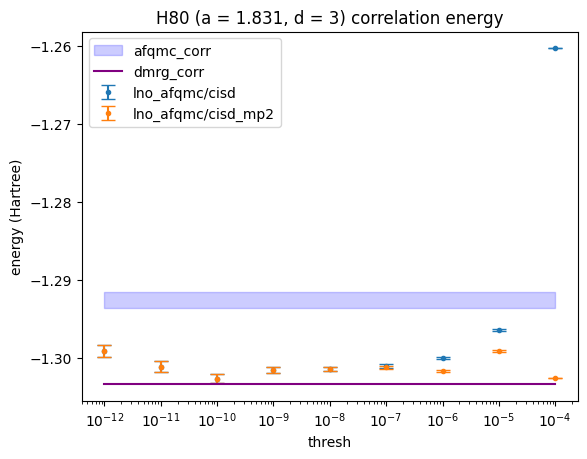

In [6]:
plt.errorbar(
    lno_thresh,lno_qmc_corr,yerr=lno_qmc_err,fmt='.',capsize=5,label='lno_afqmc/cisd')
plt.errorbar(
    lno_thresh,lno_qmc_p2_corr,yerr=lno_qmc_err,fmt='.',capsize=5,label='lno_afqmc/cisd_mp2')
# plt.plot(
#     lno_thresh,lno_ccsd_corr,'^',label='lno_ccsd')
x = np.linspace(min(lno_thresh),max(lno_thresh),100)
plt.fill_between(
    x, afqmc_corr+afqmc_err,afqmc_corr-afqmc_err, color='blue', alpha=0.2,label='afqmc_corr')
# plt.plot(x,[ccsd_corr]*100,'--',color='grey',label='ccsd_corr')
# plt.plot(x,[ccsd_t_corr]*100,'--',color='black',label='ccsd(t)_corr')
plt.plot(x,[dmrg_corr]*100,'-',color='purple',label='dmrg_corr')
plt.xlabel('thresh')
plt.xscale('log')
plt.ylabel('energy (Hartree)')
plt.title('H80 (a = 1.831, d = 3) correlation energy')
plt.legend()
plt.show()